## HW02 Code

### Name: Your name here

You will complete the following notebook, as described in the PDF for Homework 02 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.  (This can be generated by printing the notebook as PDF, or using the **File -> Download as** menu.  If you have trouble with the latter, a nice approach is to download in Markdown format, and then use a Markdown reader to print to PDF, which tends to produce nicer results than does printing from a browser.)

In [13]:
# import libraries as needed
import numpy as np
import pandas as pd
import math

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

### Plotting function

**Do not modify the following**: it takes in a list of polynomial (integer) values, along with associated lists consisting of the predictions made for the associated model, and the resulting error, and plots the results in a grid.

In [14]:
def plot_predictions(polynomials=list(), prediction_list=list(), error_list=list()):
    '''Plot predicted results for a number of polynomial regression models
    
    Args
    ----
    polynomials : list of positive integer values
        Each value is the degree of a polynomial regression model.
    prediction_list: list of arrays ((# polynomial models) x (# input data))
        Each array contains the predicted y-values for input data.
    error_list: list of error values ((# polynomial models) x 1)
        Each value is the mean squared error (MSE) of the model with 
        the associated polynomial degree.
    
        Note: it is expected that all lists are of the same length, and 
            that this length be some perfect square (for grid-plotting).
    '''
    length = len(prediction_list)
    grid_size = int(math.sqrt(length))
    if not (length == len(polynomials) and length == len(error_list)):
        raise ValueError("Input lists must be of same length")
    if not length == (grid_size * grid_size):
        raise ValueError("Need a square number of list items (%d given)" % (length))
    
    fig, axs = plt.subplots(grid_size, grid_size, figsize =(14,14), sharey=True)
    for subplot_id, prediction in enumerate(prediction_list):
        # order data for display
        data_frame = pd.DataFrame(data=[x[:, 0], prediction]).T
        data_frame = data_frame.sort_values(by=0)
        x_sorted = data_frame.iloc[:, :-1].values
        prediction_sorted = data_frame.iloc[:, 1].values

        ax = axs.flat[subplot_id]
        ax.set_title('degree = %d; MSE = %.3f' % (polynomials[subplot_id], error_list[subplot_id]))
        ax.plot(x, y, 'r.')
        ax.plot(x_sorted, prediction_sorted, color='blue')
        
    plt.show()

### Load the dataset

In [15]:
data = pd.read_csv('data.csv')
data

,x_i,y_i
0,1.590909,2.846988
1,1.803030,2.959811
2,4.984848,13.041394
3,1.696970,3.971889
4,1.272727,2.454520
...,...,...
95,5.090909,11.537465
96,10.500000,10.381492
97,1.484848,2.683212
98,0.636364,1.437600


In [16]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

### 1. Test a range of polynomial functions fit to the data

Fit models to data of polynomial degree $d \in \{1, 2, 3, 4, 5, 6, 10, 11, 12\}$.  For each such model, we will record its predictions on the input data, along with the mean squared error (MSE) that it makes.  These results are then plotted for comparison.

#### 1.1 Create function to generate models, make predictions, measure error.

In [36]:
import numpy as np
import pandas
import math

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

def test_polynomials(polynomials=list()):
    '''Generates a series of polynomial regression models on input data.
       Each model is fit to the data, then used to predict values of that
       input data.  Predictions and mean squared error are collected and
       returned as two lists.
    
    Args
    ----
    polynomials : list of positive integer values
        Each value is the degree of a polynomial regression model, to be built.
    
    Returns
    -------
    prediction_list: list of arrays ((# polynomial models) x (# input data))
        Each array contains the predicted y-values for input data.
    error_list: list of error values ((# polynomial models) x 1)
        Each value is the mean squared error (MSE) of the model with 
        the associated polynomial degree.
    '''
    data = pandas.read_csv('Data.csv')
    x = data.iloc[:, :-1].values
    y = data.iloc[:, 1].values
   # xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3)
    length = len(polynomials)


    prediction_list = list()
    error_list = list()
    for i in polynomials:
        polyTransform = PolynomialFeatures(degree=i)
        
        xTransform = polyTransform.fit_transform(x)
        linearRegressionModel = LinearRegression()
        linearRegressionModel.fit(xTransform, y)
        
        predict = linearRegressionModel.predict(xTransform)
        mse = mean_squared_error(y, predict)
        prediction_list.append(predict)
        error_list.append(mse)

        
    return prediction_list, error_list
    
#as the degree goes up, the error is smaller and the error decreases slower and slower

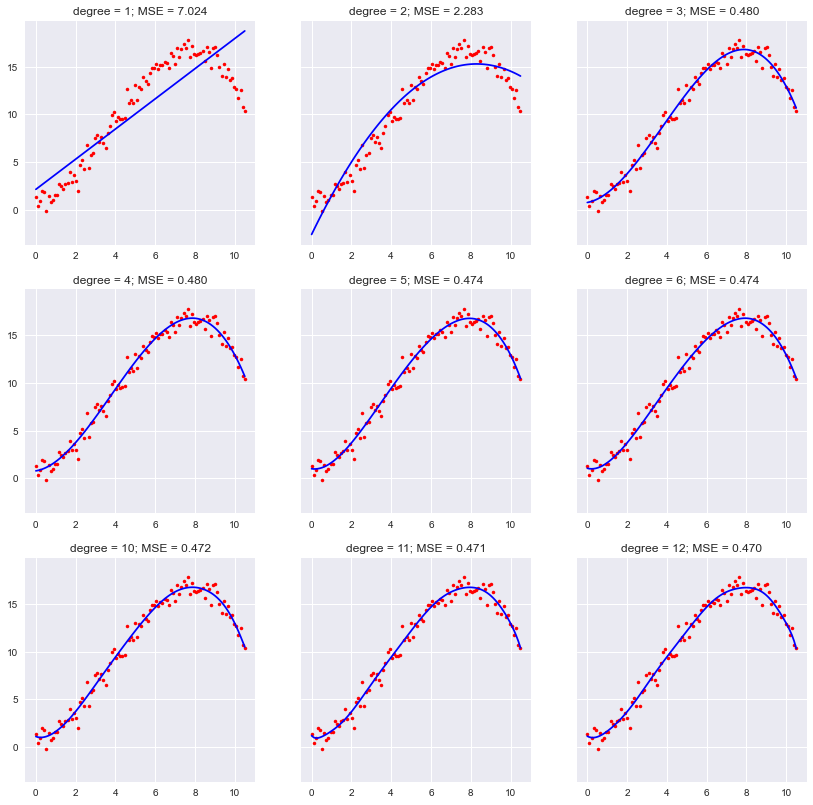

In [37]:
# TODO: generate the sequence of degrees, call test_polynomials to create models,
#       use plot_predictions to show the results
polynomials = [1, 2, 3, 4, 5, 6, 10, 11, 12]
prediction_list, error_list = test_polynomials(polynomials)
plot_predictions(polynomials, prediction_list, error_list)

#### 1.2 Discuss the results seen in the plots above

**Discussion**:  The results show... (***TODO***)

### 2. $k$-fold cross-validation 

For each of the polynomial degrees, 5-fold cross-validation is performed.  Data is divided into 5 equal parts, and 5 separate models are trained and tested.  Results are averaged over the 5 runs and plotted (in a single plot), comparing training and test error for each of the polynomial degrees.  Error values are also shown in a tabular form.

#### Creating the $k$ folds

A function that generates the distinct, non-overlapping folds of the data.  (**Don't modify this.**)

In [28]:
# A simple function for generating different data-folds.
#
# DO NOT MODIFY THIS CODE.
def make_folds(x_data, y_data, num_folds=1):
    '''Splits data into num_folds separate folds for cross-validation.
       Each fold should consist of M consecutive items from the
       original data; each fold should be the same size (we will assume 
       that  the data divides evenly by num_folds).  Every data item should 
       appear in exactly one fold.
       
       Args
       ----
       x_data: input data.
       y_data: matching output data.
           (Expected that these are of the same length.)
       num_folds : some positive integer value
           Number of folds to divide data into.
           
        Returns
        -------
        x_folds : list of sub-sequences of original x_data 
            There will be num_folds such sequences; each will 
            consist of 1/num_folds of the original data, in
            the original order.
        y_folds : list of sub-sequences of original y_data
            There will be num_folds such sequences; each will 
            consist of 1/num_folds of the original data, in
            the original order.
       '''
    x_folds = list()
    y_folds = list()
    
    foldLength = (int)(len(x_data) / num_folds)
    start = 0
    for fold in range(num_folds):
        end = start + foldLength
        x_folds.append(x_data[start:end])
        y_folds.append(y_data[start:end])
        start = start + foldLength
        
    return x_folds, y_folds

In [29]:
# Print out start/end of each fold for sanity check.  Should see 5 folds,
# with the (x,y) pairs at the start/end of each.  (Can be manually verified 
# by looking at original input file.)
#
# DO NOT MODIFY THIS CODE.
k = 5
x_folds, y_folds = make_folds(x, y, k)
for i in range(k):
    print("Fold %d: (%.3f, %.3f) ... (%.3f, %.3f)"
         % (i, x_folds[i][0], y_folds[i][0], x_folds[i][-1], y_folds[i][-1]))

Fold 0: (1.591, 2.847) ... (10.394, 10.739)
Fold 1: (6.788, 16.408) ... (2.227, 4.722)
Fold 2: (9.545, 13.897) ... (3.924, 10.229)
Fold 3: (2.864, 5.929) ... (7.212, 16.030)
Fold 4: (7.530, 16.982) ... (0.848, 0.990)


#### 2.1 Perform cross-validation

For each of the polynomial degrees already considered, $k$-fold cross-validation is performed.  Average training error (MSE) and test error (MSE) are reported, both in the form of a plot and a tabular print of the values.

polynomials order is 1, trainning error is 6.9776406183845,test error is 7.44115651272561
polynomials order is 2, trainning error is 2.245920078402712,test error is 2.625608154791994
polynomials order is 3, trainning error is 0.47162055974893224,test error is 0.5580828437253594
polynomials order is 4, trainning error is 0.4699092227255779,test error is 0.574623183302972
polynomials order is 5, trainning error is 0.463663180605469,test error is 0.5745796271730705
polynomials order is 6, trainning error is 0.4620686264007741,test error is 0.5866062520145446
polynomials order is 10, trainning error is 0.45719905316479387,test error is 0.6247478311175966
polynomials order is 11, trainning error is 0.4532938422919847,test error is 0.6549529228281182
polynomials order is 12, trainning error is 0.45189113246196666,test error is 0.6625493415182239


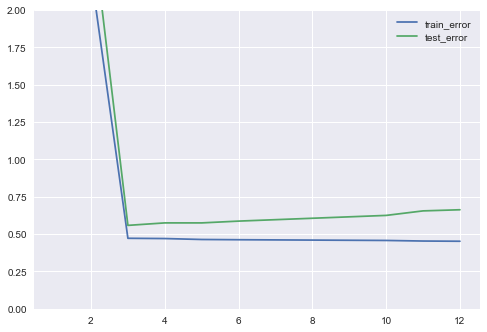

In [30]:
import numpy as np
import pandas
import math

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

data = pandas.read_csv('Data.csv')

index = 0

train_error_list = []
test_error_list = []
    
for i in polynomials:
    x = data.iloc[:, :-1].values
    y = data.iloc[:, 1].values

    train_all = 0
    test_all = 0
    xTrain = x
    yTrain = y
    polyTransform = PolynomialFeatures(degree=i)

    
    for j in range(5):
        
        x_folds, y_folds = make_folds(x, y, 5)
        
        xTest = x_folds[j]
        xTrain = np.delete(np.array(x_folds), j, 0).reshape(-1, 1)

        yTest = y_folds[j]
        yTrain = np.delete(np.array(y_folds), j, 0).reshape(-1, 1)
        

        xTrainTransform = polyTransform.fit_transform(xTrain)
        xTestTransform = polyTransform.fit_transform(xTest)
        linearRegressionModel = LinearRegression()
        linearRegressionModel.fit(xTrainTransform, yTrain)

        yTrainPredict = linearRegressionModel.predict(xTrainTransform)
        yTestPredict = linearRegressionModel.predict(xTestTransform)
        mseTrain = mean_squared_error(yTrain, yTrainPredict)
        mseTest = mean_squared_error(yTest, yTestPredict)

        train_all += mseTrain
        test_all += mseTest
        xTrain = x
        yTrain = y
    train_error_list.append(train_all/5)
    test_error_list.append(test_all/5)
    print(f"polynomials order is {i}, trainning error is {train_all/5},test error is { test_all/5}")

plt.plot(polynomials, train_error_list, label = 'train_error')
plt.plot(polynomials, test_error_list, label = 'test_error')
plt.ylim(0,2)
plt.legend()

#as the degree goes up, train error and test error both drops.
#however, finally train error continues to drop but test error goes up a little bit and the test error is much higher than train error. 
# beyond 3, the degree is too high, and the model is overfitting on average

#### 2.2 Discuss the results seen in the plots above

**Discussion:** The results show... (***TODO***)

### 3. Regularized (ridge) regression

Ridge regularization is a process whereby the loss function that is minimized combines the usual measure (error on the training data) with a penalty that is applied to the magnitude of individual coefficients.  This latter penalty discourages models that overly emphasize any single feature, and can often prevent over-fitting.

Here, a set of 50 different `sklearn.linear_model.Ridge` models are generated, each using a single polynomial degree (the one that was determined to be best for the data-set in earlier tests), and using a range of different regularization penalties, chosen from a logarithmic series: $s \in [0.01, 100]$.  5-fold cross-validation is again used to examine how robust these models are.

#### 3.1 Cross-validation for each regularization strength value

Strength is 100.0, trainning error is 0.50395711043291,test error is 0.556572066497341
Strength is 35.938136638046274, trainning error is 0.4804399395943893,test error is 0.5390850867960616
Strength is 12.91549665014884, trainning error is 0.4752473861621729,test error is 0.5410447096164628
Strength is 4.641588833612779, trainning error is 0.4728651728751497,test error is 0.5466354781232842
Strength is 1.6681005372000592, trainning error is 0.47190294601503435,test error is 0.5521565557046617
Strength is 0.5994842503189409, trainning error is 0.47166764455665805,test error is 0.5555583916222697
Strength is 0.21544346900318845, trainning error is 0.471627289358944,test error is 0.5571113669945796
Strength is 0.07742636826811278, trainning error is 0.47162146241628333,test error is 0.5577246264006296
Strength is 0.02782559402207126, trainning error is 0.47162067795129053,test error is 0.5579528930648388
Strength is 0.01, trainning error is 0.4716205750915698,test error is 0.5580359831355

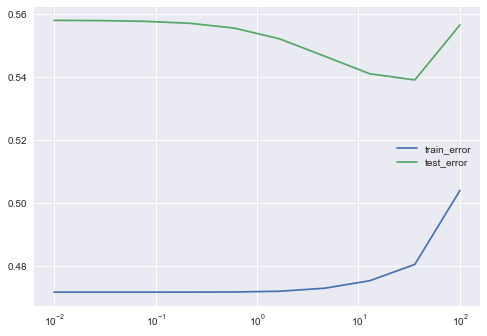

In [31]:
import numpy as np
import pandas
import math

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

strength = np.logspace(2, -2, 10, 50)
data = pandas.read_csv('Data.csv')

index = 0

train_error_list = []
test_error_list = []
    
for i in strength:
    x = data.iloc[:, :-1].values
    y = data.iloc[:, 1].values

    train_all = 0
    test_all = 0
    xTrain = x
    yTrain = y
    polyTransform = PolynomialFeatures(degree=3)

    
    for j in range(5):
        
        x_folds, y_folds = make_folds(x, y, 5)
        
        xTest = x_folds[j]
        xTrain = np.delete(np.array(x_folds), j, 0).reshape(-1, 1)

        yTest = y_folds[j]
        yTrain = np.delete(np.array(y_folds), j, 0).reshape(-1, 1)
        

        xTrainTransform = polyTransform.fit_transform(xTrain)
        xTestTransform = polyTransform.fit_transform(xTest)
        linearRegressionModel = linear_model.Ridge(alpha=i)
        linearRegressionModel.fit(xTrainTransform, yTrain)

        yTrainPredict = linearRegressionModel.predict(xTrainTransform)
        yTestPredict = linearRegressionModel.predict(xTestTransform)
        mseTrain = mean_squared_error(yTrain, yTrainPredict)
        mseTest = mean_squared_error(yTest, yTestPredict)

        train_all += mseTrain
        test_all += mseTest
        xTrain = x
        yTrain = y
    train_error_list.append(train_all/5)
    test_error_list.append(test_all/5)
    print(f"Strength is {i}, trainning error is {train_all/5},test error is { test_all/5}")


plt.xscale('log')

plt.plot(strength, train_error_list, label = 'train_error')
plt.plot(strength, test_error_list, label = 'test_error')
plt.legend()

# the error of test is always greater than the error of train. 
#as the strength increases, the test error generally decreases at first but finally increases
#as the strength increases, the train error keeps increasing because the train error is overfitting
#at the range of alpha between 10-31, the difference between train error and test error is relatively small and simultanesously both error are relatively small

#### 3.2 Discuss the results seen in the plots above

**Discussion**:  The results show...  (***TODO***)